# Accuracy Over Time

#### Analysis of all years of fantasy football data. Specifically, looks at correlation across years and by position.

**Question 1:** Were experts or fans better at predicting final season points, and which years had the best predictions?

**Steps:**

A. Create dataframes of top 25 players by position for all years

B. Create dataframes of top 25 players by position for each year

C. Find the correlation between FantasyPoints, ExpertRanking and the reranked ADP

D. Create a data frame based on these correlations

E. Find average correlation for experts and fans over all years

E. Plot this data frame in a line chart

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [38]:
#Reads in data

merged_df = pd.read_csv('../data/cleaned/actual_and_projected.csv')

In [49]:
#Creates dataframes of top 25 players by position for all years

qb_df = merged_df[merged_df["Pos"].str.contains("QB")].sort_values(by=['ADP_rerank']).iloc[:125]
rb_df = merged_df[merged_df["Pos"].str.contains("RB")].sort_values(by=['ADP_rerank']).iloc[:125]
wr_df = merged_df[merged_df["Pos"].str.contains("WR")].sort_values(by=['ADP_rerank']).iloc[:125]
te_df = merged_df[merged_df["Pos"].str.contains("TE")].sort_values(by=['ADP_rerank']).iloc[:125]

In [54]:
#Creates dataframes of top 25 players by position for each year

merged_2019_df = pd.concat([qb_df[qb_df["Year"] == 2019], rb_df[rb_df["Year"] == 2019], wr_df[wr_df["Year"] == 2019], te_df[te_df["Year"] == 2019]])
merged_2018_df = pd.concat([qb_df[qb_df["Year"] == 2018], rb_df[rb_df["Year"] == 2018], wr_df[wr_df["Year"] == 2018], te_df[te_df["Year"] == 2018]])
merged_2017_df = pd.concat([qb_df[qb_df["Year"] == 2017], rb_df[rb_df["Year"] == 2017], wr_df[wr_df["Year"] == 2017], te_df[te_df["Year"] == 2017]])
merged_2016_df = pd.concat([qb_df[qb_df["Year"] == 2016], rb_df[rb_df["Year"] == 2016], wr_df[wr_df["Year"] == 2016], te_df[te_df["Year"] == 2016]])
merged_2015_df = pd.concat([qb_df[qb_df["Year"] == 2015], rb_df[rb_df["Year"] == 2015], wr_df[wr_df["Year"] == 2015], te_df[te_df["Year"] == 2015]])

In [58]:
#Determines correlation for each year

corr_2019_df = merged_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
corr_2018_df = merged_2018_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
corr_2017_df = merged_2017_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
corr_2016_df = merged_2016_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
corr_2015_df = merged_2015_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()

In [108]:
#Creates dataframe for correlations

corr_data_by_year = {'experts':[corr_2015_df["ExpertRanking"]["FantasyPoints"], 
        corr_2016_df["ExpertRanking"]["FantasyPoints"], corr_2017_df["ExpertRanking"]["FantasyPoints"], 
        corr_2018_df["ExpertRanking"]["FantasyPoints"], corr_2019_df["ExpertRanking"]["FantasyPoints"]] ,
        'fans': [corr_2015_df["ADP_rerank"]["FantasyPoints"], 
        corr_2016_df["ADP_rerank"]["FantasyPoints"], corr_2017_df["ADP_rerank"]["FantasyPoints"], 
        corr_2018_df["ADP_rerank"]["FantasyPoints"], corr_2019_df["ADP_rerank"]["FantasyPoints"]]}

combined_corr_by_year_df = pd.DataFrame(corr_data_by_year, index =['2015', '2016', '2017', '2018', '2019']) 
combined_corr_by_year_df

,experts,fans
2015,0.219011,0.134322
2016,0.379731,0.347275
2017,0.259755,0.278839
2018,0.468456,0.472861
2019,0.340468,0.254866


In [110]:
#Finds average correlation for experts over all years

combined_corr_by_year_df["experts"].sum() / 5

0.33348423094731133

In [111]:
#Finds average correlation for fans over all years

combined_corr_by_year_df["fans"].sum() / 5

0.297632477697872

<AxesSubplot:title={'center':'Accuracy by Year'}, xlabel='Year', ylabel='Accuracy'>

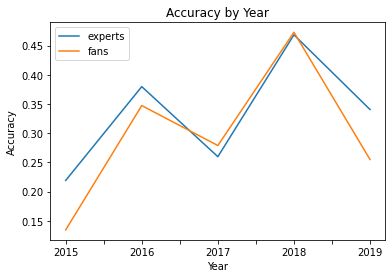

In [119]:
#Creates line graph

combined_corr_by_year_df.plot(kind = "line", ylabel = "Accuracy", xlabel = "Year", title = "Accuracy by Year")

**Answer:**

Experts were slightly better at predicting than fans, with an average correlation of .333 vs .298. 2018 was the best year for both experts and fans, while 2015 was the worst for both.

**Observations/Interpretations:**

It is interesting to see that correlation was very different by year. Furthermore, it is not consistently increasing, and there seems to be better years and worse years.

**Question 2:** How similar were fans and experts projections?

A. Find the correlation between FantasyPoints, ExpertRanking and the reranked ADP

B. Create dataframe with correlation between ExpertRanking and ADP_rerank

C. Plot this data frame in a bar chart

In [73]:
# Finds the correlation between FantasyPoints, ExpertRanking and the reranked ADP

qb_corr_df = qb_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
rb_corr_df = rb_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
wr_corr_df = wr_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
te_corr_df = te_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()

In [74]:
# Creates dataframe with correlation between ExpertRanking and ADP_rerank

corr_data_expert_and_fan = {'correlation':[qb_corr_df["ExpertRanking"]["ADP_rerank"], 
        rb_corr_df["ExpertRanking"]["ADP_rerank"], wr_corr_df["ExpertRanking"]["ADP_rerank"], 
        te_corr_df["ExpertRanking"]["ADP_rerank"]]}

combined_corr_expert_and_fan_df = pd.DataFrame(corr_data_expert_and_fan, index =['QB', 'RB', 'WR', 'TE']) 
combined_corr_expert_and_fan_df

,correlation
QB,0.975408
RB,0.945341
WR,0.953280
TE,0.876487


In [120]:
combined_corr_expert_and_fan_df.mean()

correlation    0.937629
dtype: float64

<AxesSubplot:title={'center':'Average Correlation by Position Between Expert and Fan Picks'}, xlabel='Position', ylabel='Correlation'>

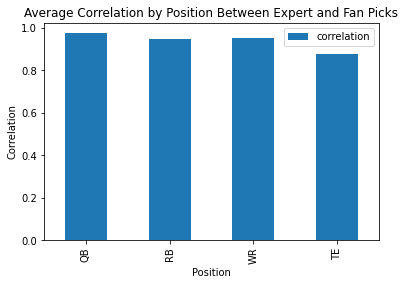

In [103]:
#Plots in bar chart

combined_corr_expert_and_fan_df.plot(kind = "bar", ylabel = "Correlation", xlabel = "Position", title = "Average Correlation by Position Between Expert and Fan Picks")

**Answer:**

Experts and fans had very similar predictions for all positions. QBs were the highest while TEs were the lowest.

**Observations/Interpretations:**

I expected them to be similar, but was surprised at how high the correlations were. I also would have thought that RBs would have been the highest as they are usually drafted faster than other positions.

**Question 3:** Which positions had the highest accuracy predictions for all years?

A. Create dataframe for correlations

B. Find average correlation from both fans and experts

C. Input average into data frame

D. Plot this data frame in a bar chart

In [115]:
#Creates dataframe for correlations

corr_data = {'experts':[qb_corr_df["ExpertRanking"]["FantasyPoints"], 
        rb_corr_df["ExpertRanking"]["FantasyPoints"], wr_corr_df["ExpertRanking"]["FantasyPoints"], 
        te_corr_df["ExpertRanking"]["FantasyPoints"]] , 'fans': [qb_corr_df["ADP_rerank"]["FantasyPoints"], 
        rb_corr_df["ADP_rerank"]["FantasyPoints"], wr_corr_df["ADP_rerank"]["FantasyPoints"], 
        te_corr_df["ADP_rerank"]["FantasyPoints"]]}

combined_corr_df = pd.DataFrame(corr_data, index =['QB', 'RB', 'WR', 'TE']) 
combined_corr_df

,experts,fans
QB,0.341788,0.312715
RB,0.410844,0.368179
WR,0.330299,0.315708
TE,0.422816,0.368507


In [116]:
#Find average correlation from both fans and experts
average_correlation = (combined_corr_df["experts"] + combined_corr_df["fans"]) / 2.0

In [117]:
#Input into data frame

combined_corr_df["average"] = average_correlation

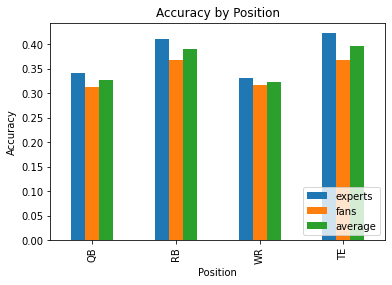

In [118]:
#Plot in bar chart

combined_corr_df.plot(kind = "bar", ylabel = "Accuracy", xlabel = "Position", title = "Accuracy by Position")
plt.legend(loc = 4)

**Answer:**

The average correlation was highest for RBs and TEs, and lowest for QBs and WRs. Experts had better accuracy for every position.

**Observations/Interpretations:**

Based on previous observations, it is not surprising that experts had a higher correlation value for all positions. I did expect the average correlations to be about the same for each position, but this was not the case.